# TNNC1

In [13]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [14]:
TNNC1_Path = pd.read_csv('TNNC1.txt', sep='\t')
TNNC1_Path

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
0,NM_003280.3(TNNC1):c.91G>T (p.Ala31Ser),TNNC1,A31S,Hypertrophic cardiomyopathy 13,"Pathogenic(Last reviewed: Sep 14, 2012)",no assertion criteria provided,VCV000039832,3,52486233,3,52452217,39832,48431,rs397514616,NC_000003.12:52452216:C:A,NaN
1,NM_003280.3(TNNC1):c.23C>T (p.Ala8Val),TNNC1,A8V,Cardiovascular phenotype|Dilated cardiomyopath...,Pathogenic/Likely pathogenic(Last reviewed: Au...,"criteria provided, multiple submitters, no con...",VCV000012443,3,52488009,3,52453993,12443,27482,rs267607125,NC_000003.12:52453992:G:A,NaN


In [15]:
TNNC1_LP = pd.read_csv('TNNC1_LP.txt', sep='\t')
newTNNC1_LP = TNNC1_LP['Condition(s)'].str.contains("Hypertrophic cardiomyopathy")
TNNC1_LP1 = TNNC1_LP[newTNNC1_LP].dropna(subset=['Protein change'])
TNNC1_LP1

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
3,NM_003280.3(TNNC1):c.168G>C (p.Glu56Asp),TNNC1,E56D,Dilated cardiomyopathy 1Z|Hypertrophic cardiom...,"Likely pathogenic(Last reviewed: Sep 2, 2021)","criteria provided, single submitter",VCV001066522,3,52486156,3,52452140,1066522,1055379,NaN,NC_000003.12:52452139:C:G,NaN
6,NM_003280.3(TNNC1):c.23C>T (p.Ala8Val),TNNC1,A8V,Cardiovascular phenotype|Hypertrophic cardiomy...,Pathogenic/Likely pathogenic(Last reviewed: Fe...,"criteria provided, multiple submitters, no con...",VCV000012443,3,52488009,3,52453993,12443,27482,rs267607125,NC_000003.12:52453992:G:A,NaN


In [16]:
combined2 = [TNNC1_LP1, TNNC1_Path]
TNNC1_combined = pd.concat(combined2)
TNNC1_combined

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
3,NM_003280.3(TNNC1):c.168G>C (p.Glu56Asp),TNNC1,E56D,Dilated cardiomyopathy 1Z|Hypertrophic cardiom...,"Likely pathogenic(Last reviewed: Sep 2, 2021)","criteria provided, single submitter",VCV001066522,3,52486156,3,52452140,1066522,1055379,NaN,NC_000003.12:52452139:C:G,NaN
6,NM_003280.3(TNNC1):c.23C>T (p.Ala8Val),TNNC1,A8V,Cardiovascular phenotype|Hypertrophic cardiomy...,Pathogenic/Likely pathogenic(Last reviewed: Fe...,"criteria provided, multiple submitters, no con...",VCV000012443,3,52488009,3,52453993,12443,27482,rs267607125,NC_000003.12:52453992:G:A,NaN
0,NM_003280.3(TNNC1):c.91G>T (p.Ala31Ser),TNNC1,A31S,Hypertrophic cardiomyopathy 13,"Pathogenic(Last reviewed: Sep 14, 2012)",no assertion criteria provided,VCV000039832,3,52486233,3,52452217,39832,48431,rs397514616,NC_000003.12:52452216:C:A,NaN
1,NM_003280.3(TNNC1):c.23C>T (p.Ala8Val),TNNC1,A8V,Cardiovascular phenotype|Dilated cardiomyopath...,Pathogenic/Likely pathogenic(Last reviewed: Au...,"criteria provided, multiple submitters, no con...",VCV000012443,3,52488009,3,52453993,12443,27482,rs267607125,NC_000003.12:52453992:G:A,NaN


In [17]:
combo = TNNC1_combined[['Name']]
np.array(np.array(combo['Name'].str.split(' ')).item(0)).item(0)
lst = []
for i in np.arange(len(TNNC1_combined)):
    lst = np.append(lst, np.array(np.array(combo['Name'].str.split(' ')).item(i)).item(0))
    
lst
combo = Table().with_columns('Name', lst)
combo.show()

Name
NM_003280.3(TNNC1):c.168G>C
NM_003280.3(TNNC1):c.23C>T
NM_003280.3(TNNC1):c.91G>T
NM_003280.3(TNNC1):c.23C>T


In [18]:
import numpy as np
TNNC1_ensembl_np = Table().read_table('TNNC1_ensembl.txt', sep='\t').where('BIOTYPE', 'protein_coding')
new = TNNC1_ensembl_np.select('#Uploaded_variation', 'Consequence')
new

#Uploaded_variation,Consequence
NM_003280.3(TNNC1):c.168G>C,missense_variant
NM_003280.3(TNNC1):c.168G>C,upstream_gene_variant
NM_003280.3(TNNC1):c.168G>C,upstream_gene_variant
NM_003280.3(TNNC1):c.168G>C,upstream_gene_variant
NM_003280.3(TNNC1):c.168G>C,upstream_gene_variant
NM_003280.3(TNNC1):c.168G>C,missense_variant
NM_003280.3(TNNC1):c.91G>T,missense_variant
NM_003280.3(TNNC1):c.91G>T,upstream_gene_variant
NM_003280.3(TNNC1):c.91G>T,upstream_gene_variant
NM_003280.3(TNNC1):c.91G>T,upstream_gene_variant


In [19]:
def label_consequence(consequence):
    if 'stop_gained' in consequence:
        return 'stop_gained'
    elif 'missense_variant' in consequence:
        return 'missense_variant'
    elif 'frameshift_variant' in consequence:
        return 'frameshift_variant'
    elif 'inframe_deletion' in consequence:
        return 'inframe_deletion'

In [20]:
try1 = new.apply(label_consequence, 'Consequence')
new2 = new.with_column('Our Consequences', try1)
new2
yay = new2.where('Our Consequences', are.not_equal_to(None))
test3 = yay.group('Our Consequences')
test3

Our Consequences,count
missense_variant,5


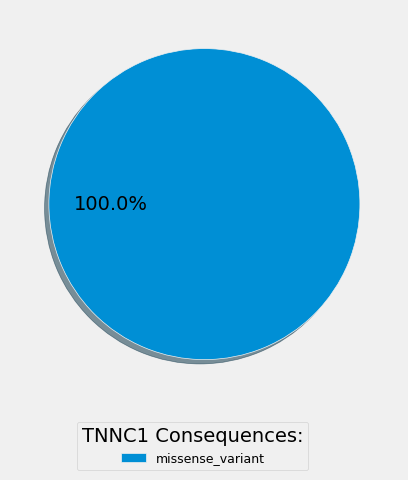

In [21]:
import matplotlib.pyplot as plt
import numpy as np
plt.pie(test3.column('count'), autopct='%1.1f%%', shadow = True)
#,labels = test3.column('Our Consequences'), autopct='%1.1f%%', shadow = True)
plt.legend(title = 'TNNC1 Consequences:', fontsize="9", labels = test3.column('Our Consequences'), loc ="lower center", bbox_to_anchor=(0.37, -0.2, 0.2, 0.2))

In [22]:
TNNC1_VUS = pd.read_csv('TNNC1_VUS.txt', sep='\t')
newTNNC1_VUS = TNNC1_VUS['Condition(s)'].str.contains("Hypertrophic cardiomyopathy")
TNNC1_VUS1 = TNNC1_VUS[newTNNC1_VUS].dropna(subset=['Protein change'])
TNNC1_VUS1

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
2,NM_003280.3(TNNC1):c.473A>G (p.Lys158Arg),TNNC1,K158R,Dilated cardiomyopathy 1Z|Hypertrophic cardiom...,"Uncertain significance(Last reviewed: Aug 21, ...","criteria provided, single submitter",VCV001442716,3,52485304,3.0,52451288,1442716,1375480,NaN,NC_000003.12:52451287:T:C,NaN
3,NM_003280.3(TNNC1):c.473A>C (p.Lys158Thr),TNNC1,K158T,Hypertrophic cardiomyopathy 13|Dilated cardiom...,"Uncertain significance(Last reviewed: Aug 26, ...","criteria provided, single submitter",VCV000470559,3,52485304,3.0,52451288,470559,453105,rs1553651622,NC_000003.12:52451287:T:G,NaN
4,NM_003280.3(TNNC1):c.470T>G (p.Met157Arg),TNNC1,M157R,Dilated cardiomyopathy 1Z|Hypertrophic cardiom...,"Uncertain significance(Last reviewed: Jul 28, ...","criteria provided, single submitter",VCV001370520,3,52485307,3.0,52451291,1370520,1430589,NaN,NC_000003.12:52451290:A:C,NaN
6,NM_003280.3(TNNC1):c.469A>C (p.Met157Leu),TNNC1,M157L,Dilated cardiomyopathy 1Z|Hypertrophic cardiom...,"Uncertain significance(Last reviewed: Sep 29, ...","criteria provided, multiple submitters, no con...",VCV000181569,3,52485308,3.0,52451292,181569,179069,rs730880230,NC_000003.12:52451291:T:G,NaN
11,NM_003280.3(TNNC1):c.452A>T (p.Asp151Val),TNNC1,D151V,Dilated cardiomyopathy 1Z|Hypertrophic cardiom...,"Uncertain significance(Last reviewed: Aug 31, ...","criteria provided, single submitter",VCV000409875,3,52485409,3.0,52451393,409875,394176,rs1060502611,NC_000003.12:52451392:T:A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,NM_003280.3(TNNC1):c.14A>G (p.Tyr5Cys),TNNC1,Y5C,Dilated cardiomyopathy 1Z|Hypertrophic cardiom...,"Uncertain significance(Last reviewed: Sep 24, ...","criteria provided, single submitter",VCV001397389,3,52488018,3.0,52454002,1397389,1437956,NaN,NC_000003.12:52454001:T:C,NaN
143,NM_003280.3(TNNC1):c.8A>G (p.Asp3Gly),TNNC1,D3G,Hypertrophic cardiomyopathy 13|Dilated cardiom...,"Uncertain significance(Last reviewed: Oct 25, ...","criteria provided, single submitter",VCV001722122,3,52488024,3.0,52454008,1722122,1776984,NaN,NC_000003.12:52454007:T:C,NaN
144,NM_003280.3(TNNC1):c.7G>A (p.Asp3Asn),TNNC1,D3N,Dilated cardiomyopathy 1Z|Hypertrophic cardiom...,"Uncertain significance(Last reviewed: Jul 18, ...","criteria provided, single submitter",VCV001062430,3,52488025,3.0,52454009,1062430,1042420,NaN,NC_000003.12:52454008:C:T,NaN
145,NM_003280.3(TNNC1):c.5A>T (p.Asp2Val),TNNC1,D2V,Hypertrophic cardiomyopathy 13|Dilated cardiom...,"Uncertain significance(Last reviewed: Aug 15, ...","criteria provided, single submitter",VCV002048914,3,52488027,3.0,52454011,2048914,2114557,NaN,NC_000003.12:52454010:T:A,NaN


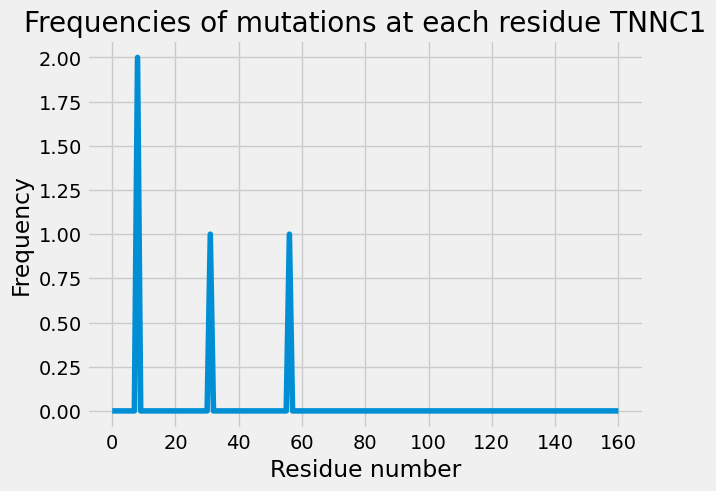

In [23]:
num_amino_acids_tnnc1 = 161

count = [0] * num_amino_acids_tnnc1

for i in TNNC1_combined.index:
    s = TNNC1_combined['Protein change'][i].replace('*', '')
    x = "".join([ele for ele in s if ele.isnumeric()])
    if x:
        x_value = int(x)
        count[x_value] += 1
        
    
# x axis values
x = [i for i in range(num_amino_acids_tnnc1)]
# corresponding y axis values
y = count
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('Residue number')
# naming the y axis
plt.ylabel('Frequency')
  
# giving a title to my graph
plt.title('Frequencies of mutations at each residue TNNC1')
  
# function to show the plot
plt.show()

# save figure
# plt.savefig('tnnc1.png')

plt.close()

In [25]:
f = open("mybpc3_mutationfreq.txt", "w")
f.write("attribute: position\n")
f.write("recipient: residues\n")
for i in range(num_amino_acids_tnnc1):
    f.write("\t" + ":" + str(i+1) + "\t" + str(count[i]) + "\n")
f.close()